<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/NLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")

columns_ = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

In [ ]:
df = df[columns_]

In [ ]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


In [ ]:
scaler = StandardScaler()

def scale_features(features, df):
  df[features] = scaler.fit_transform(df[features])

In [ ]:
scale_features(features=features, df=df)

In [ ]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,-0.960246,0.961877,-0.579207,-1.391472,5
1,-0.584777,1.967442,0.128950,-1.391472,5
2,-0.584777,1.297065,-0.048089,-1.186070,5
3,-0.584777,-1.384443,-0.461180,1.484154,6
4,-0.960246,0.961877,-0.579207,-1.391472,5


## Stratified KFold Cross Validation 

### The classes in the dataset are heavily imbalanced so in order to ensure optimal performance the data is split according to each respective class.

### In essence the train and validation portions of the dataset keep the percentage of their distribution to prevent sampling bias where certain classes which take up a bigger number of the total dataset size would end up being overrepresented in both the train and validation split. 

1) Choose hyperparameters

2) Divide the WHOLE train data into K-folds.

3) Use the train portion of each fold for training with parameters from (1), validate on the validation portion of each fold. This gives an idea about the model performance on unseen data. Do the same thing K times on the remainder of folds

4) Average the results obtained from K validations, which should give you even better idea about the generalization properties of a particular model (basically, of particular hyperparameters) on unseen data.

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# Stratified K-fold cross-validation 
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.quality
kf = StratifiedKFold(n_splits=5)

for f, (t_,v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, 'kfold'] = f
  df_train = df.loc[t_]
  df_test = df.loc[v_]

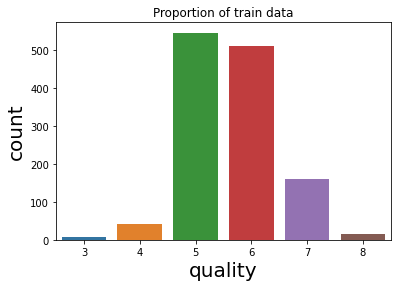

In [ ]:
# Split data into k fold = 5
def plot_distribution(df, title):
  b = sns.countplot(x='quality', data=df)
  b.set_xlabel('quality', fontsize=20)
  b.set_ylabel('count', fontsize=20)
  b.set_title(label = title)

plot_distribution(df=df_train, title = "Proportion of train data")


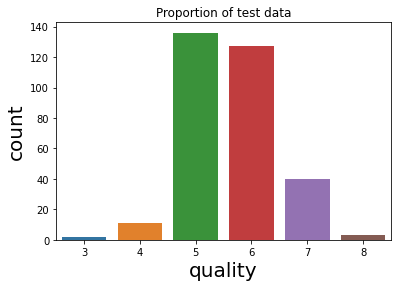

In [ ]:
plot_distribution(df=df_test, title = "Proportion of test data")


In [ ]:
df_train.head()

,alcohol,volatile acidity,sulphates,citric acid,quality,kfold
0,-0.021574,1.352930,-0.107102,-0.775267,6,0
1,0.729364,-0.267148,0.365003,0.097691,5,0
2,0.447763,-1.607903,1.663290,0.354443,6,0
3,-1.335715,3.028873,-0.520193,-0.929318,5,0
4,-1.241848,0.906012,-0.284141,-1.134720,5,0


In [ ]:
X_train = df_train.drop("quality", axis = 1).values
X_test = df_test.drop("quality", axis = 1).values 
y_train = df_train["quality"].values 
y_test = df_test["quality"].values 

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Hyperparameter selection 

### Instead of manually testing and trying to find the most optimum hyperparameters for this dataset, GridSearchCV is used to iteratively search through all the listed hyperparameters and finds the best combination of them in a single pipeline. 

### The hyperparameters are stored in the grid dictionary :

#### **loss**
The only applicable loss function for this would be a log loss as the log loss gives logistic regression, a probabilistic classifier. The other types would not work as they do not return a probabilistic and designed for a regression problem not a classification problem.

#### **alpha**
Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.

#### **penalty**
This refers to the regularization penalty used. L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. 


#### **max_iter**

This refers to the maximum number of iterations the model is allowed to go until converging. Here it is 100 numbers between 100 to 1000. 


#### **learning_rate**

The learning rate is the size of steps the optimizer takes when traversing down during gradient descent. optimal follows the following function : eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.



In [ ]:
params = {
    "loss" : ["log"],
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
    "max_iter": np.arange(10, 1000, 100),
    "learning_rate": ["optimal"]

}

model = SGDClassifier(max_iter=1000)
scoring = ['roc_auc_ovr', 'f1_weighted', 'accuracy']

In [ ]:

gd_sr = GridSearchCV(estimator=model,
                     param_grid=params,
                     scoring=scoring,
                     cv=5,
                     refit='roc_auc_ovr',
                     n_jobs=-1)

In [ ]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1,...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['optimal'], 'loss': ['log'],
                         'max_iter': array([ 10, 110, 210, 310, 410, 510, 610,

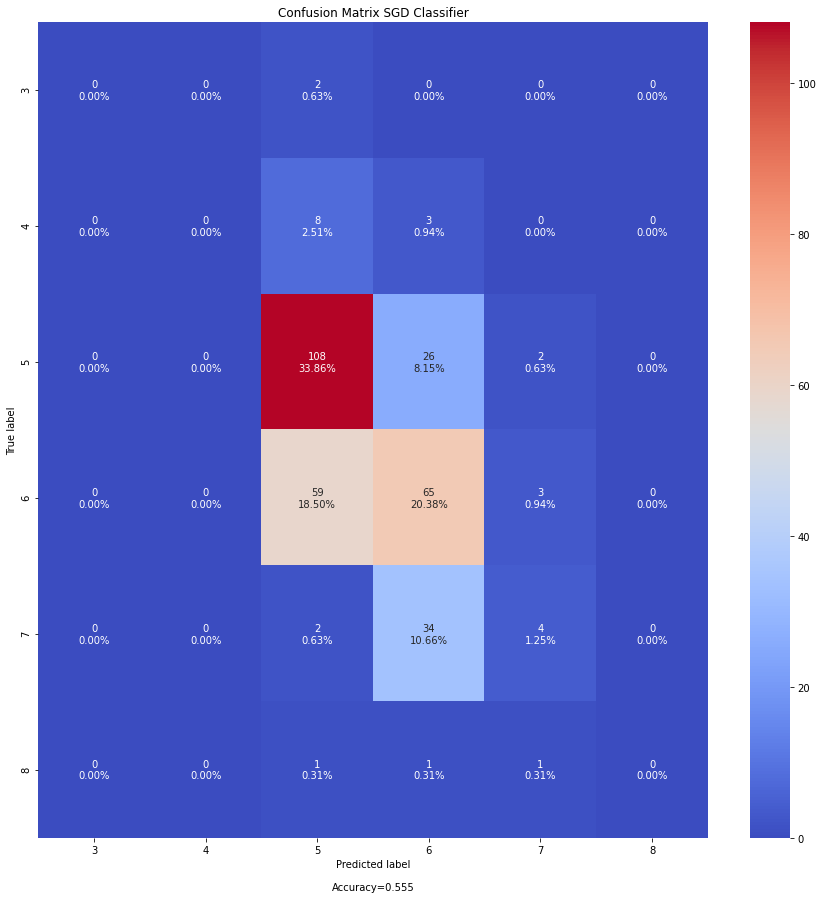

In [ ]:
y_pred_rf = gd_sr.predict(X_test)
cm_gd = confusion_matrix(y_test, y_pred_rf)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['3', '4', '5', '6', '7', '8']
make_confusion_matrix(cm_gd, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm',
                      figsize=(15,15),
                      title="Confusion Matrix SGD Classifier")

In [ ]:
print(classification_report(y_test, y_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.60      0.79      0.68       136
           6       0.50      0.51      0.51       127
           7       0.40      0.10      0.16        40
           8       0.00      0.00      0.00         3

    accuracy                           0.55       319
   macro avg       0.25      0.23      0.23       319
weighted avg       0.51      0.55      0.51       319



In [ ]:
print('The best model is: ', gd_sr.best_params_)
print('This model produces ROC_AUC_OVR score of', gd_sr.best_score_)

The best model is:  {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 210, 'penalty': 'none'}
This model produces ROC_AUC_OVR score of 0.805704929734787


## Model Evalutaion 

### The best model which is made up of the parameters {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 210, 'penalty': 'none'} produces a ROC_AUC_OVR score of 0.806 and an accuracy of 0.555.

### ROC_AUC_OVR is the True Positive Rate vs the False Positive Rate of the model. Having a ROC_AUC_OVR of 1.00 would indicate that the model is perfect at distinguishing between the multiclass problem and makes 0 errors that are false positives. 

### Based on the printed confusion matrix the model also has a f1-score of 0.51, precision of 0.51 and a recall of 0.55 which are satisfactory for this highly imbalanced dataset. 